In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

seno aproximado 0.7071064695751781 y el numero de iteraciones 4
seno aproximado 0.7071067829368671 y el numero de iteraciones 5
seno aproximado 0.7071067811865679 y el numero de iteraciones 7


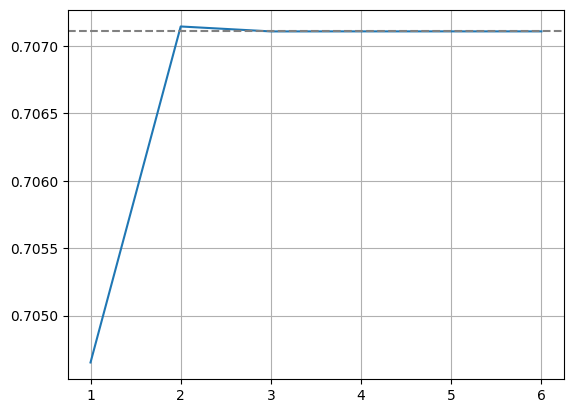

In [ ]:
def sino(x, tol):
  term = x
  total = term
  n = 1
  y0 = []
  while abs(term) > tol:
    term = (-1)**n * (x**(2*n+1)) / (math.factorial(2*n+1))
    total += term
    n += 1
    y0.append(total)
  return total, n, y0

tols = [1e-3, 1e-6, 1e-10]
for tol in tols:
  x = math.pi/4
  t1, n1, y1 = sino(x, tol)
  print(f"seno aproximado {t1} y el numero de iteraciones {n1}")
x1 = np.linspace(1, len(y1), len(y1))
plt.plot(x1, y1)
plt.grid()
plt.axhline(t1, color='gray', linestyle='--')

In [ ]:
sino(math.pi/2, 1e-6)

(1.5707963267948966, 1)

Ln(x+1) aproximado 1.3654517237331167 y el numero de iteraciones 18
Ln(x+1) aproximado 1.365039208909243 y el numero de iteraciones 43
Ln(x+1) aproximado 1.3650396144448265 y el numero de iteraciones 79


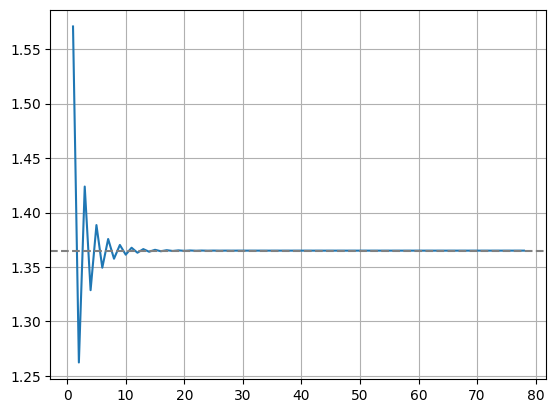

In [ ]:
def ln(x, tol):
  term = x
  total = term
  n = 1
  y0 = []
  while abs(term) > tol:
    term = (-1)**(n-1) *((x**n)/ n)
    total += term
    n += 1
    y0.append(total)
  return total, n, y0

tols = [1e-3, 1e-6, 1e-10]
for tol in tols:
  x = math.pi/4
  t1, n1, y1 = sino(x, tol)
  print(f"Ln(x+1) aproximado {t1} y el numero de iteraciones {n1}")
x1 = np.linspace(1, len(y1), len(y1))
plt.plot(x1, y1)
plt.grid()
plt.axhline(t1, color='gray', linestyle='--')

n = 1: Aproximación = 1.0000000000, Error relativo = 0.1835034191, Error % = 18.3503419072
n = 2: Aproximación = 1.2500000000, Error relativo = 0.0206207262, Error % = 2.0620726160
n = 3: Aproximación = 1.2187500000, Error relativo = 0.0048947920, Error % = 0.4894791994
n = 4: Aproximación = 1.2265625000, Error relativo = 0.0014840875, Error % = 0.1484087544
n = 5: Aproximación = 1.2241210938, Error relativo = 0.0005093123, Error % = 0.0509312312
n = 6: Aproximación = 1.2249755859, Error relativo = 0.0001883776, Error % = 0.0188377638
n = 7: Aproximación = 1.2246551514, Error relativo = 0.0000732561, Error % = 0.0073256093
n = 8: Aproximación = 1.2247810364, Error relativo = 0.0000295286, Error % = 0.0029528587
n = 9: Aproximación = 1.2247298956, Error relativo = 0.0000122277, Error % = 0.0012227689
n = 10: Aproximación = 1.2247512043, Error relativo = 0.0000051708, Error % = 0.0005170759
n = 11: Aproximación = 1.2247421481, Error relativo = 0.0000022236, Error % = 0.0002223582
n = 12:

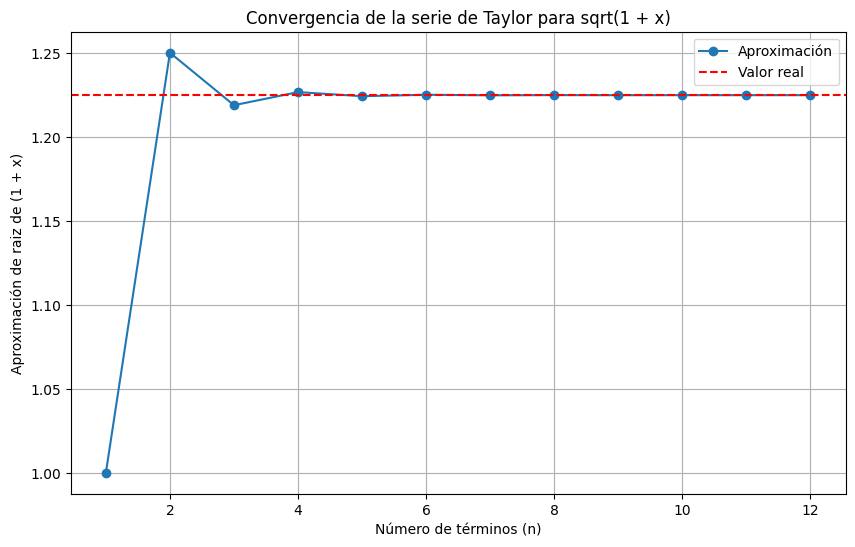

Evaluación con distintos valores de x y tolerancia de 1e-6:
x = 0.1: Se necesitan 5 términos para alcanzar la tolerancia.
x = 0.3: Se necesitan 8 términos para alcanzar la tolerancia.
x = 0.5: Se necesitan 12 términos para alcanzar la tolerancia.
x = 0.7: Se necesitan 21 términos para alcanzar la tolerancia.
x = 0.9: Se necesitan 54 términos para alcanzar la tolerancia.


In [ ]:
x = 0.5
valor_real = math.sqrt(1 + x)
# Función para calcular el coeficiente binomial generalizado (alpha sobre n)
def coef_binomial(alpha, n):
    coefi = 1
    for k in range(n):
        coefi *= (alpha - k) / (k + 1)
    return coefi

# Función para calcular la serie de Taylor hasta cierto número de términos
def serie_bino(x, num_terminos):
    alpha = 0.5
    suma = 0
    for n in range(num_terminos):
        termino = coef_binomial(alpha, n) * x**n
        suma += termino
    return suma

aproximaciones = []
errores_relativos = []
errores_porcentuales = []
# a.) y b.)
for n in range(1, 13):  # de 1 a 20 términos
    aproximacion = serie_bino(x, n)
    error_relativo = abs((valor_real - aproximacion) / valor_real)
    error_porcentual = error_relativo * 100
    aproximaciones.append(aproximacion)
    errores_relativos.append(error_relativo)
    errores_porcentuales.append(error_porcentual)
    print(f"n = {n}: Aproximación = {aproximacion:.10f}, Error relativo = {error_relativo:.10f}, Error % = {error_porcentual:.10f}")
# Se puede concluir que la serie converge relativamente rápido, apartir de la tercera iteración el error porcentual ya es menor a 0.5%
# c.)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 13), aproximaciones, label='Aproximación', marker='o')
plt.axhline(y=valor_real, color='r', linestyle='--', label='Valor real')
plt.title('Convergencia de la serie de Taylor para sqrt(1 + x)')
plt.xlabel('Número de términos (n)')
plt.ylabel('Aproximación de raiz de (1 + x)')
plt.legend()
plt.grid()
plt.show()

#Evaluación para distintos valores de x y criterio de tolerancia
valores_x = [0.1, 0.3, 0.5, 0.7, 0.9]
tol = 1e-6
print("Evaluación con distintos valores de x y tolerancia de 1e-6:")
for x_val in valores_x:
    valor_real = math.sqrt(1 + x_val)
    for n in range(1, 100):
        aprox = serie_bino(x_val, n)
        error_rel = abs((valor_real - aprox) / valor_real)
        if error_rel < tol:
            print(f"x = {x_val}: Se necesitan {n} términos para alcanzar la tolerancia.")
            break
